In [116]:
%matplotlib inline

In [117]:
import matplotlib
import numpy as np

In [118]:
from skimage import io
from sklearn import mixture
from file_utils import get_jpgs_in_dir

In [119]:
root_path = '/Users/samuelalbanie/aims_course/project_two/code/DATASET/'

In [120]:
import os
from glob import glob

In [121]:
def gradient_from_name(img_name):
    gradient = float(img_name.split(':')[-1][:-4])
    return gradient

In [122]:
img_names = [y for x in os.walk(root_path) for y in glob(os.path.join(x[0], '*.jpg'))]
gradients = [gradient_from_name(img_name) for img_name in img_names]
print('The number of images is:', len(img_names))

('The number of images is:', 7255)


In [123]:
pairs = []
for img_name, gradient in zip(img_names, gradients):
    pairs.append((img_name, gradient))

In [124]:
def large_face_pass_filter(img_name, face_size=3600):
    img = io.imread(img_name)
    num_pixels = img.shape[0] * img.shape[1]
    return num_pixels > face_size

In [125]:
def large_labeled_face(pair):
    return large_face_pass_filter(pair[0])

In [126]:
large_faces = [img_name for img_name in img_names if large_face_pass_filter(img_name)]
print('The number of images is:')
print(len(large_faces))

The number of images is:
4864


In [127]:
large_pairs = [pair for pair in pairs if large_labeled_face(pair)]
face_gradients = [pair[1] for pair in large_pairs]

In [128]:
sorted_gradients = np.sort(face_gradients)
cutoff = sorted_gradients[len(sorted_gradients) / 2]

In [129]:
hist, bin_edges = np.histogram(face_gradients, bins = np.arange(min(face_gradients), max(face_gradients), step=0.2))
face_gradients_np = np.array(face_gradients).reshape(-1,1)
gmm = mixture.GMM(n_components=2)
gmm.fit(face_gradients_np) # train it!
linspace = np.linspace(min(face_gradients), max(face_gradients), 1000).reshape(-1,1)
probabilities = np.exp(gmm.score_samples(linspace)[0])

In [130]:
pairs = []
for grad, prob in zip(linspace, probabilities):
    pairs.append((grad,prob))
central_pairs = [pair for pair in pairs if 0 < pair[0] < 5]
decision_boundary = min(central_pairs, key = lambda t: t[1])

In [131]:
cutoff = decision_boundary[0][0]
cutoff_y = decision_boundary[1]
print('cutoff', cutoff)
print('cutoff_y:', cutoff_y)

('cutoff', 1.6981981981981988)
('cutoff_y:', 0.032441771565085535)


In [132]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

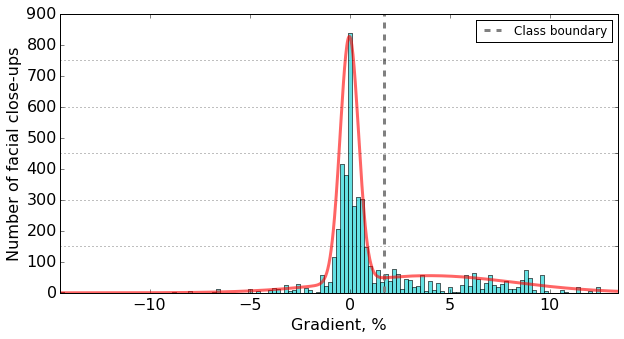

In [133]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.bar(bin_edges[:-1], hist, width = 0.2, color='darkturquoise', alpha=0.6)
ax1.set_xlim(min(face_gradients), max(face_gradients))
ax1.set_ylabel('Number of facial close-ups')
ax1.set_xlabel('Gradient, %')
plt.grid(True)
ax2.yaxis.set_ticklabels([])
class_boundary = ax2.axvline(cutoff, ymin=-1, ymax=1, lw=3, linestyle='--', color='gray', label='class boundary')

ax2.plot(linspace, probabilities , 'red', alpha=0.6, lw=3, label='Guassian Mixture Model') # draw GMM
ax2.legend([class_boundary,], ['Class boundary',], fontsize=12)
# plt.title('Distribution of face snapshot gradients', fontsize=16)
plt.savefig('/Users/samuelalbanie/Dropbox/AIMS_Tour_Project/write-up/img/SnapshotDistribution.png')   

Sort the pairs so that we can examine them manually

In [134]:
class1, class2 = 0,0
for grad in face_gradients:
    if grad < cutoff:
        class1 += 1
    else:
        class2 += 1

In [135]:
float(class2) / (float(class2) + float(class1))

0.27898848684210525

In [136]:
min(face_gradients)

-14.5

In [137]:
class1

3507

In [138]:
class2

1357

In [139]:
large_pairs.sort(key=lambda x: x[1])

In [140]:
num_images = 1000

In [141]:
downhill_imgs = [pair[0] for pair in large_pairs[:num_images]]

In [142]:
downhill_imgs[31]

'/Users/samuelalbanie/aims_course/project_two/code/DATASET/testing/2014/2/2-00_17:58:500:0:-5.0.jpg'

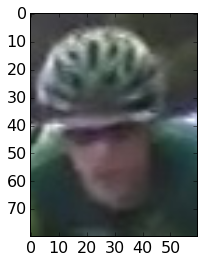

In [143]:
img = io.imread(downhill_imgs[31])
plt.imshow(img)

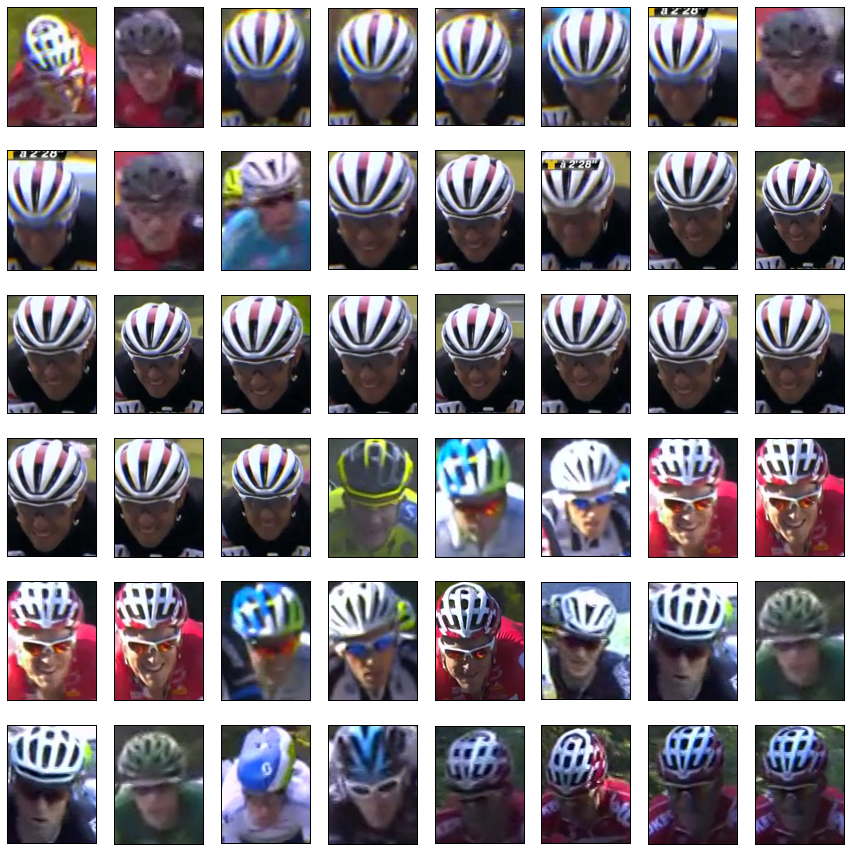

In [144]:
# row and column sharing
rows = 6
cols = 8
f, (axes) = plt.subplots(rows, cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):
        counter =  i * rows + j
        img = io.imread(downhill_imgs[counter])
        ax = axes[i,j]
        ax.imshow(img)
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
# f.subplots_adjust(hspace=0.1, vspace=0.1)

In [145]:
uphill_imgs = [pair[0] for pair in large_pairs[-num_images:]]

In [146]:
uphill_imgs[15]

'/Users/samuelalbanie/aims_course/project_two/code/DATASET/testing/2014/2/2-00_18:55:000:2:3.5.jpg'

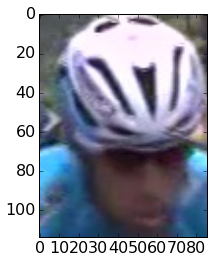

In [147]:
img = io.imread(uphill_imgs[19])
plt.imshow(img)

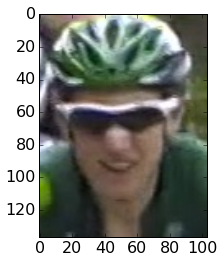

In [148]:
img = io.imread(uphill_imgs[804])
plt.imshow(img)

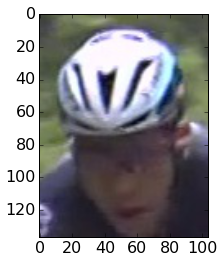

In [149]:
img = io.imread(uphill_imgs[420])
plt.imshow(img)

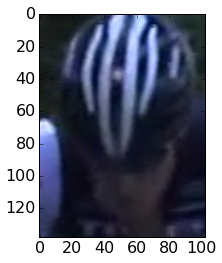

In [150]:
img = io.imread(uphill_imgs[138])
plt.imshow(img)

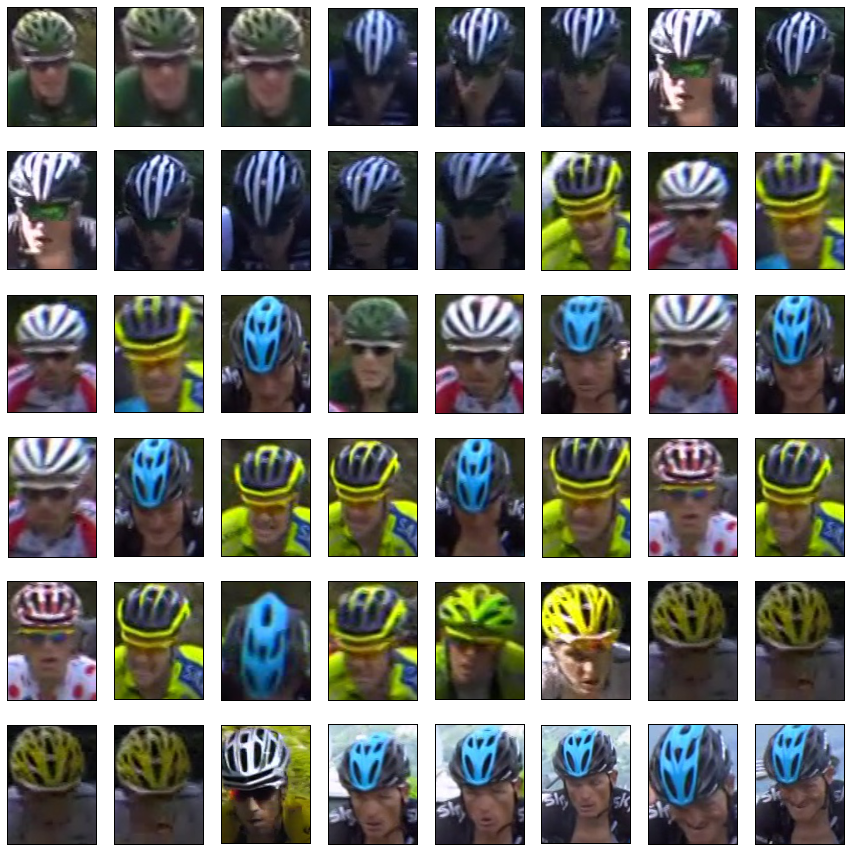

In [151]:
# row and column sharing
rows = 6
cols = 8
f, (axes) = plt.subplots(rows, cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):
        counter = i * rows + j
        img = io.imread(uphill_imgs[counter + 130])
        ax = axes[i,j]
        ax.imshow(img)
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
# f.subplots_adjust(hspace=0.1, vspace=0.1)

In [152]:
uphill_imgs = [pair[0] for pair in pairs[-10:]]

In [153]:
# note, these were set with num_images = 1000
sample_faces = [downhill_imgs[76], downhill_imgs[571], downhill_imgs[919],
                uphill_imgs[19], uphill_imgs[138], uphill_imgs[420], uphill_imgs[804]]

IndexError: list index out of range

In [154]:
sample_gradients = [gradient_from_name(face) for face in sample_faces]

NameError: name 'sample_faces' is not defined

In [155]:
sample_gradients

NameError: name 'sample_gradients' is not defined

In [ ]:
# row and column sharing
rows = 1
cols = 7
f, (axes) = plt.subplots(rows, cols, figsize=(10,15))

for i in range(rows):
    for j in range(cols):
        counter = i * cols + j
        img = io.imread(sample_faces[counter])
        ax = axes[j]
        ax.imshow(img)
        ax.set_title(str(sample_gradients[counter]) + "%")
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
plt.savefig('faceRow.png')

In [ ]:
flat_class, steep_class = [], []

In [ ]:
for img_name, grad in large_pairs:
    if grad < cutoff:
        flat_class.append((img_name, grad))
    else:
        steep_class.append((img_name, grad))

In [ ]:
len(flat_class)

In [ ]:
len(steep_class)

In [ ]:
flat_test_idx = np.random.uniform(0, len(flat_class), 50)
steep_test_idx = np.random.uniform(0, len(steep_class), 50)

In [ ]:
test_pairs = []
for idx in flat_test_idx:
    test_pairs.append(flat_class[int(idx)])
for idx in steep_test_idx:
    test_pairs.append(steep_class[int(idx)])

In [ ]:
len(test_pairs)

In [54]:
from digit_classifier import find_number
from file_utils import get_paths
from gradients import find_gradient
from extract_cyclist_faces import load_cache
import matplotlib
%matplotlib inline

In [58]:
root_path = '/Users/samuelalbanie/aims_course/project_two/code/DVD/deinterlaced/2014/'
img_name = '/Users/samuelalbanie/aims_course/project_two/code/debugging/testCase.jpg'

In [59]:
paths = get_paths(root_path, 17)
cache = load_cache(paths)
distance_to_go = find_number(img_name, cache['paths'], cache['model'], cache['templates'])

In [60]:
distance_to_go

22.4

In [71]:
gradient = find_gradient(cache['paths'], 23.3)

In [72]:
gradient

5.0